In [1]:
from Neural_Nets.LaengeNetModified.Development.LaengeNetModified import LaengeNetModified, LaengeNetModifiedLossFunc
from Neural_Nets.ThermoDatasetModified.Development.ThermoDatasetModified import ThermoDatasetModified
from Utils.PlotHandler.Development.PlotHandler import PlotHandler 
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torch.optim import Rprop
from Data_Handling.SGTEHandler.Development.SGTEHandler import SGTEHandler
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def epoch(net: LaengeNetModified, dataloader, loss_func, optimizer):
    epoch_losses = np.zeros([len(dataloader), ])

    for i, (temp, target) in enumerate(dataloader):
        temp = temp.unsqueeze(-1)

        # Forward pass
        prediction = net(temp.float())
        
        # Get the loss
        loss = loss_func(prediction, target)
        
        # Backward pass
        net.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses[i] = loss

    mean_epoch_loss = epoch_losses.mean(axis=0)
    #print('Mean epoch loss: ', mean_epoch_loss)
    return mean_epoch_loss

In [13]:
def train(net, dataset):
    # Hyperparameters
    n_epochs = 100
    lr = 0.01
    batch_size = 32

    # Data
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Optimizer
    optimizer = Rprop(net.parameters(), lr=lr)
    loss_func = LaengeNetModifiedLossFunc()

    losses = []
    
    best_loss = epoch(net, dataloader, loss_func, optimizer)
    best_net = net

    for i in range(n_epochs):
        #print('-----\nEpoch %i:\n' % i)
        loss = epoch(net, dataloader, loss_func, optimizer)
        losses.append(loss)
        
        if loss < best_loss:
            best_net = net
        
    return losses, net

In [14]:
net = LaengeNetModified(hidden_dim=16)

element = 'Fe'
phase = ['BCC_A2']
start_temp, end_temp = 200, 2000

dataset = ThermoDatasetModified(element, phase, step=2, start_temp=start_temp, end_temp=end_temp)

losses, best_net = train(net, dataset)

Fe successfully selected!

(850, 5)


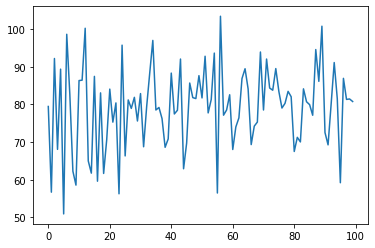

In [15]:
plt.plot(range(len(losses)), losses)

In [16]:
ph = PlotHandler('Laenge')

ph.properties_temp(best_net, element, phase, scaling=False, start_temp=start_temp, end_temp=end_temp)

Fe successfully selected!



TypeError: forward() takes 2 positional arguments but 5 were given